In [1]:
import plotly.express as px
import pandas as pd
import ipywidgets as widgets
from ipywidgets import interact, interact_manual
df = px.data.iris()
df

,sepal_length,sepal_width,petal_length,petal_width,species,species_id
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1
3,4.6,3.1,1.5,0.2,setosa,1
4,5.0,3.6,1.4,0.2,setosa,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,3
146,6.3,2.5,5.0,1.9,virginica,3
147,6.5,3.0,5.2,2.0,virginica,3
148,6.2,3.4,5.4,2.3,virginica,3


In [2]:
print (df.describe(include='all'))

        sepal_length  sepal_width  petal_length  petal_width species  \
count     150.000000   150.000000    150.000000   150.000000     150   
unique           NaN          NaN           NaN          NaN       3   
top              NaN          NaN           NaN          NaN  setosa   
freq             NaN          NaN           NaN          NaN      50   
mean        5.843333     3.054000      3.758667     1.198667     NaN   
std         0.828066     0.433594      1.764420     0.763161     NaN   
min         4.300000     2.000000      1.000000     0.100000     NaN   
25%         5.100000     2.800000      1.600000     0.300000     NaN   
50%         5.800000     3.000000      4.350000     1.300000     NaN   
75%         6.400000     3.300000      5.100000     1.800000     NaN   
max         7.900000     4.400000      6.900000     2.500000     NaN   

        species_id  
count   150.000000  
unique         NaN  
top            NaN  
freq           NaN  
mean      2.000000  
std      

#### Let's start with a simple way to filter the dataframe via widgets, and display the results in a graph. In this first iteration, we'll create a different df for every filtering operation

In [3]:
print ('Select values to filter the dataframe:')
def show_df(MaxSepLen, MinSepLen,MinSepWidth,MaxSepWidth):
 

    df2 = (df[df['sepal_length']<=MaxSepLen])
    df3 = (df2[df2['sepal_length']>=MinSepLen])
    df4 = (df3[df3['sepal_width']>=MinSepWidth])
    Filtered = (df4[df4['sepal_width']<=MaxSepWidth])
    fig = px.scatter(Filtered, x='sepal_length', y='sepal_width', 
                     size = 'sepal_length',color = 'species')
    fig.show()
    
    
    
    print ('Length of selected df: ',len(Filtered))
    
    
interact(show_df, MaxSepLen = [8,7,6,5,4,3,2,1,0], 
         MinSepLen = [0,1,2,3,4,5,6,7,8],
         MinSepWidth = [0,1,2,3,4,5],
        MaxSepWidth = [5,4,3,2,1,0],
        ) 

Select values to filter the dataframe:


interactive(children=(Dropdown(description='MaxSepLen', options=(8, 7, 6, 5, 4, 3, 2, 1, 0), value=8), Dropdow…

<function __main__.show_df(MaxSepLen, MinSepLen, MinSepWidth, MaxSepWidth)>

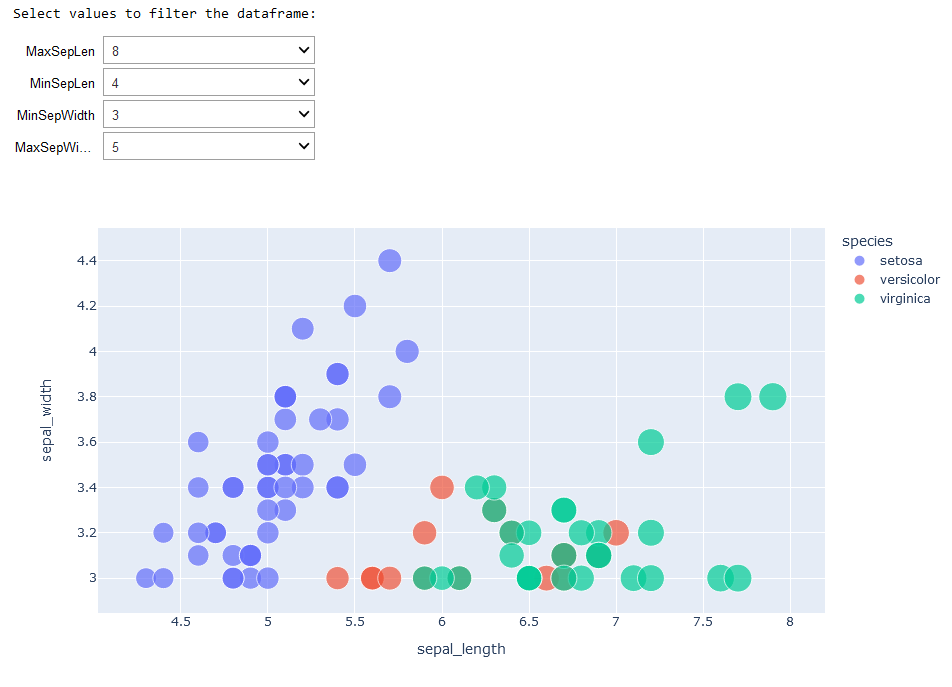

#### Creating a new df for every filtering opeation is not very efficient. Let's improve that a bit by creating only a single df for all filtering operations.

In [4]:
print ('Select values to filter the dataframe:')
def show_df(MaxSepLen, MinSepLen,MinSepWidth,MaxSepWidth):
    df2 = (df[(df['sepal_length']<=MaxSepLen) & (df['sepal_length']>=MinSepLen)
           & (df['sepal_width']>=MinSepWidth) & (df['sepal_width']<=MaxSepWidth)])

    fig = px.scatter(df2, x='sepal_length', y='sepal_width', 
                     size = 'sepal_length',color = 'species')
    fig.update_xaxes(rangeslider_visible=True)
    
    fig.show()
 
    
   
    
interact(show_df, MaxPetLen = [8,7,6,5,4,3,2,1,0], 
         MinPetLen = [0,1,2,3,4,5,6,7,8],
         MinSepWidth = [0,1,2,3,4,5],
        MaxSepWidth = [5,4,3,2,1,0],
        ) 




Select values to filter the dataframe:


interactive(children=(Dropdown(description='MaxSepLen', options=(8, 7, 6, 5, 4, 3, 2, 1, 0), value=8), Dropdow…

<function __main__.show_df(MaxSepLen, MinSepLen, MinSepWidth, MaxSepWidth)>

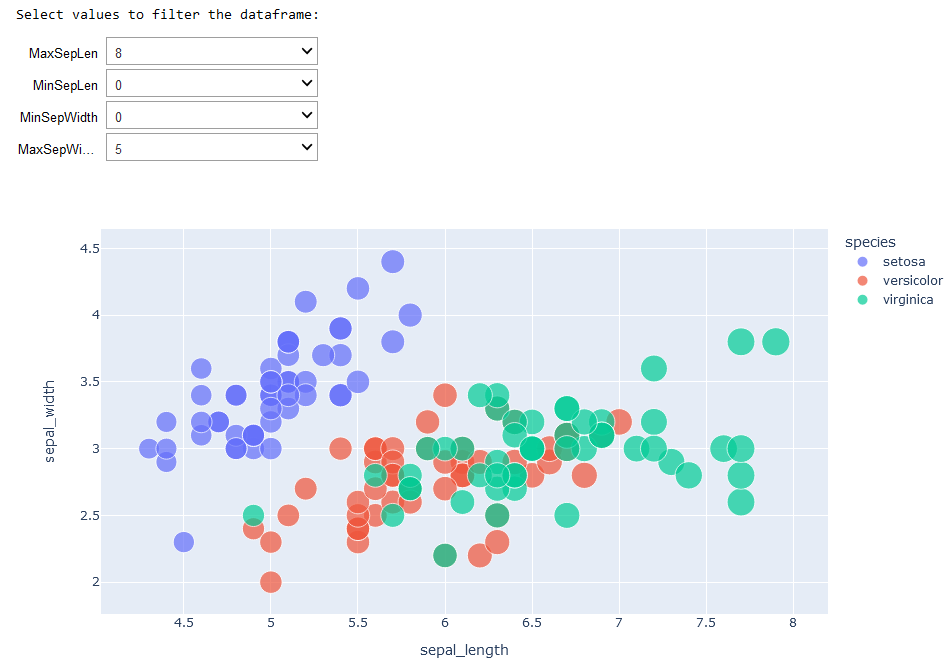

#### To filter the x-axis values, we can also use the native rangeslider function in plotly. By using this function, a second plot is generated, and the sliders on the edges of this plot can be used to trim the data plotted in the main graph:

In [13]:
print ('Select values to filter the dataframe:')
def show_df(MinSepWidth,MaxSepWidth):
    df2 = (df[(df['sepal_width']>=MinSepWidth) & (df['sepal_width']<=MaxSepWidth)])

    fig = px.scatter(df2, x='sepal_length', y='sepal_width', 
                     size = 'sepal_length',color = 'species')
    fig.update_xaxes(rangeslider_visible=True)
    
    fig.show()
 
    
   
    
interact(show_df, 
         MinSepWidth = [0,1,2,3,4,5],
        MaxSepWidth = [5,4,3,2,1,0],
        ) 

Select values to filter the dataframe:


interactive(children=(Dropdown(description='MinSepWidth', options=(0, 1, 2, 3, 4, 5), value=0), Dropdown(descr…

<function __main__.show_df(MinSepWidth, MaxSepWidth)>

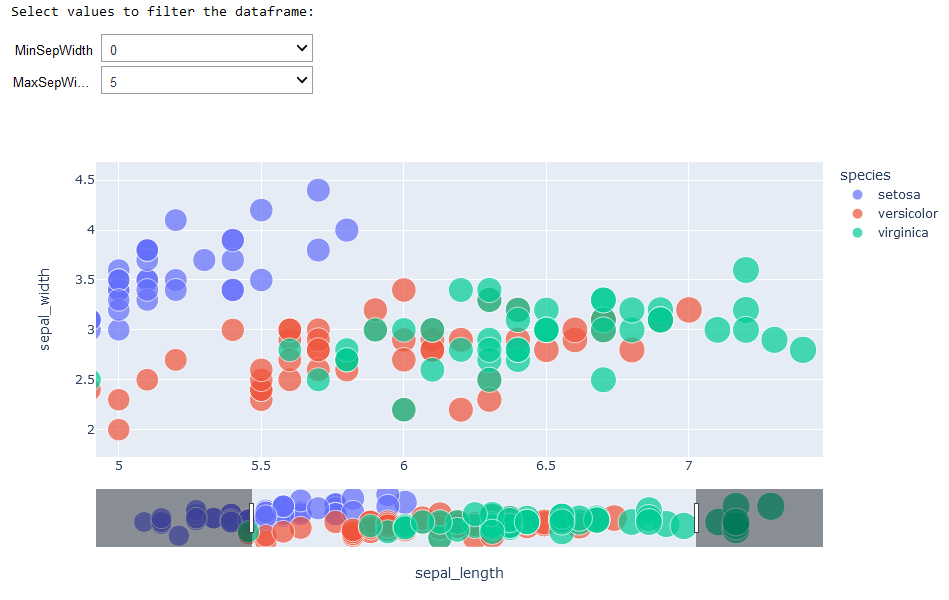

#### By using the widgets, we can filter the plotted dataframe also on parameters that are not plotted in the graph's axis, like the petal length.

In [17]:
   
print ('Select values to filter the dataframe:')
def show_df(MaxPetLen, MinPetLen,MinSepWidth,MaxSepWidth):
    df2 = (df[(df['petal_length']<=MaxPetLen) & (df['petal_length']>=MinPetLen)
           & (df['sepal_width']>=MinSepWidth) & (df['sepal_width']<=MaxSepWidth)])

    fig = px.scatter(df2, x='sepal_length', y='sepal_width', 
                     size = 'sepal_length',color = 'species')
    fig.update_xaxes(rangeslider_visible=True)
    fig.show()
    
   
    
interact(show_df, MaxPetLen = [8,7,6,5,4,3,2,1,0], 
         MinPetLen = [0,1,2,3,4,5,6,7,8],
         MinSepWidth = [0,1,2,3,4,5],
        MaxSepWidth = [5,4,3,2,1,0],
        ) 

Select values to filter the dataframe:


interactive(children=(Dropdown(description='MaxPetLen', options=(8, 7, 6, 5, 4, 3, 2, 1, 0), value=8), Dropdow…

<function __main__.show_df(MaxPetLen, MinPetLen, MinSepWidth, MaxSepWidth)>

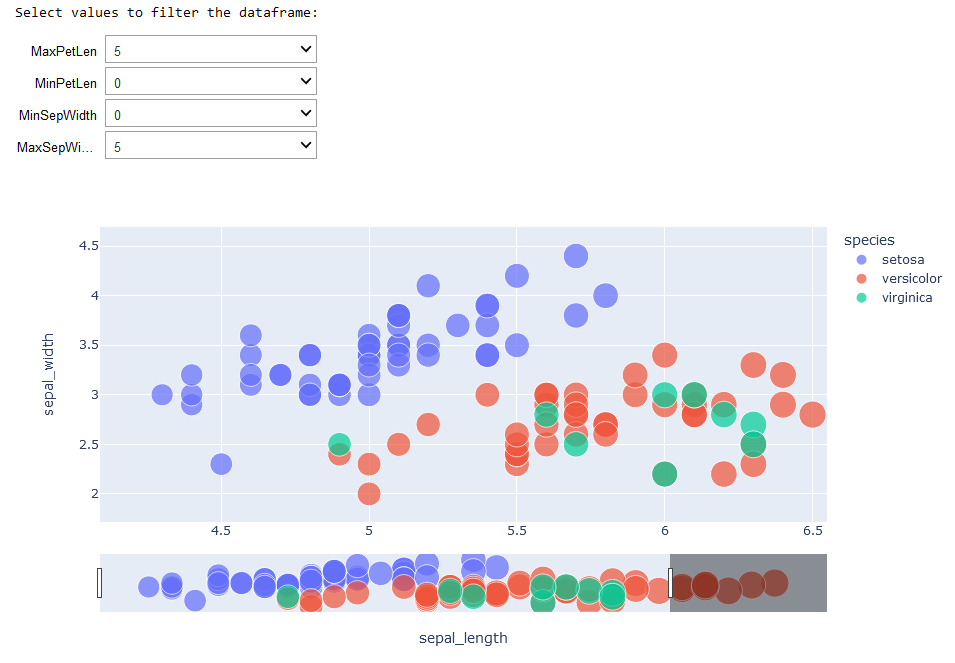